In [1]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# The starter code is short and simple, take a look!
from starter import *
from numpy import random

/opt/homebrew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Phase 1 - Create Inputs

In [3]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # TODO add edges to complete the small input
    for i in range(99):
        for j in range(i+1,100):
            G.add_edge(i, j, weight=1000)
    G.add_edge(0,1,weight=1000)
    
def medium(G: nx.Graph):
    # TODO add edges to complete the medium input
    for i in range(2, 300):
        G.add_edge(i, 0, weight=700)
        G.add_edge(i, 1, weight=1000)
    G.add_edge(0,1,weight=800)    
    
def large(G: nx.Graph):
    # TODO add edges to complete the large input
    for i in range(2, 1000):
        G.add_edge(i, 0, weight=500)
        G.add_edge(i, 1, weight=1000)
    G.add_edge(0,1,weight=415)

In [4]:
G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in')

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in')

G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in')

AssertionError: File already exists and overwrite set to False. Move file or set overwrite to True to proceed.

# Phase 2 - Implement your Solver

In [12]:
def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']
    
    # list of penguins
    penguin_list = list(G.nodes)
    # sort edges by weight
    # dictionary edge weight: vertices that make up that edge
    weight_dict = {}
    for edge in G.edges:
        key = G.get_edge_data(edge[0], edge[1])['weight']
        if key in weight_dict.keys():
            weight_dict[key].append(edge)
        else:
            weight_dict[key] = [edge]
    # list storing sorted keys descending
    weight_dict_keys_sorted = sorted(weight_dict.keys(), reverse=True)
    
    # starting num nodes
    num_groups = G.number_of_nodes() // 10
    group_dict = {} # group_num : (group_size, group_weight, [])
    
    # creating the groups
    for i in range(1, num_groups + 1, 1):
        group_dict[i] = [0, 0, []]
    
    # iterating through edge weights in weight_dict
    for weight in weight_dict_keys_sorted:
        curr_edges = weight_dict[weight] # current edges starting from heaviest edge
        for edge in curr_edges:
            # Penguin 0
            group_size = get_group_size(group_dict) # group_size : [group_id's]
            group_size_keys_sorted = sorted(group_size.keys(), reverse=False) # sorting the size of each group ascending
            smallest_groups_list = group_size[group_size_keys_sorted[0]] # the list of group_id's corresponding to the smallest weight
            penguin_0 = edge[0]
            smallest_weight_added_id_penguin_0 = smallest_groups_list[0]
            smallest_weight_added_penguin_0 = float('inf')
            # Find the group ID with the smallest weight added and place it in smallest_weight_added_id
            for group in smallest_groups_list:
                weight_contributed = check_weight_contributed(G, group_dict, group_dict[group][2], penguin_0)
                if weight_contributed < smallest_weight_added_penguin_0:
                    smallest_weight_added_penguin_0 = weight_contributed
                    smallest_weight_added_id_penguin_0 = group
            # Add penguin 0 to the group and add it to all the dictionaries/lists needed, and remove it from all the dictionaries/lists needed
            if penguin_0 in penguin_list:
                group_dict[smallest_weight_added_id_penguin_0][0] += 1 # increasing group size
                group_dict[smallest_weight_added_id_penguin_0][1] += smallest_weight_added_penguin_0 # adding to the total weight of the group
                group_dict[smallest_weight_added_id_penguin_0][2].append(penguin_0) # adding penguin_0 to group_dict
                G.nodes[penguin_0]['team'] = smallest_weight_added_id_penguin_0
                penguin_list.remove(penguin_0)
            # Penguin 1
            group_size = get_group_size(group_dict) # group_size : [group_id's]
            group_size_keys_sorted = sorted(group_size.keys(), reverse=False) # sorting the size of each group ascending
            smallest_groups_list = group_size[group_size_keys_sorted[0]] # the list of group_id's corresponding to the smallest weight
            penguin_1 = edge[0]
            smallest_weight_added_id_penguin_1 = smallest_groups_list[0]
            smallest_weight_added_penguin_1 = float('inf')
            for group in smallest_groups_list:
                weight_contributed = check_weight_contributed(G, group_dict, group_dict[group][2], penguin_1)
                if weight_contributed < smallest_weight_added_penguin_1:
                    smallest_weight_added_penguin_1 = weight_contributed
                    smallest_weight_added_id_penguin_1 = group
            # Add penguin 1 to the group and add it to all the dictionaries/lists needed, and remove it from all the dictionaries/lists needed
            if penguin_1 in penguin_list:
                group_dict[smallest_weight_added_id_penguin_1][0] += 1 # increasing group size
                group_dict[smallest_weight_added_id_penguin_1][1] += smallest_weight_added_penguin_0 # adding to the total weight of the group
                group_dict[smallest_weight_added_id_penguin_1][2].append(penguin_1) # adding penguin_1 to group_dict
                G.nodes[penguin_1]['team'] = smallest_weight_added_id_penguin_1
                penguin_list.remove(penguin_1)
    # dealing with leftover penguins
    for penguin in penguin_list:
        group_size = get_group_size(group_dict) # group_size : [group_id's]
        group_size_keys_sorted = sorted(group_size.keys(), reverse=False) # sorting the size of each group ascending
        smallest_groups_list = group_size[group_size_keys_sorted[0]] # the list of group_id's corresponding to the smallest weight
        # Add penguin to the group and add it to all the dictionaries/lists needed, and remove it from all the dictionaries/lists needed
        group_dict[smallest_groups_list[0]][0] += 1 # increasing group size
        group_dict[smallest_groups_list[0]][2].append(penguin) # adding penguin to group_dict
        G.nodes[penguin]['team'] = smallest_groups_list[0]
    pass

def get_group_size(group_dict: dict) -> dict:
    """
    get group size
    """
    group_size = {} # group size : [group_id's]
    for group_id in group_dict:
        value = group_dict[group_id]
        if value[0] in group_size:
            group_size[value[0]].append(group_id)
        else:
            group_size[value[0]] = [group_id]
    return group_size

def check_weight_contributed(G: nx.graph, group_dict: dict, penguins_in_group: list, incoming_penguin: int) -> int:
    """
    returns new weight of the group after adding incoming_penguin
    """
    total_weight = 0
    for penguin in penguins_in_group:
        edge_data = G.get_edge_data(incoming_penguin, penguin)
        if edge_data:
            total_weight += edge_data['weight']
    return total_weight

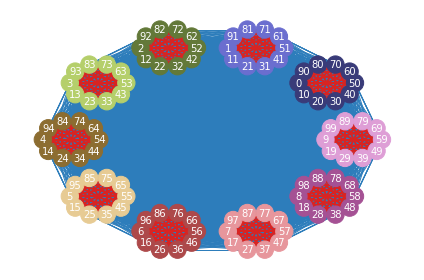

464842.31591025763

In [13]:
G = read_input('small.in')
solve(G)
validate_output(G)
visualize(G)
score(G)

In [14]:
run(solve, 'small.in', 'small.out')

AssertionError: File already exists and overwrite set to False. Move file or set overwrite to True to proceed.

In [ ]:
run_all(solve, 'input', 'output')
tar('output')

  0%|                                           | 1/780 [00:00<01:21,  9.55it/s]

input/large225.in: cost 5.184705528587072e+23
input/small232.in: cost 26292.31591025766
input/large116.in: cost 5.184705528587072e+23


  1%|▏                                          | 4/780 [00:00<01:09, 11.12it/s]

input/large59.in: cost 5.184705528587072e+23
input/small150.in: cost 129376.31591025766


  1%|▍                                          | 8/780 [00:00<01:33,  8.25it/s]

input/large147.in: cost 5.184705528587072e+23
input/small101.in: cost 176892.31591025766
input/small197.in: cost 144990.31591025766
input/small206.in: cost 77319.31591025766


  1%|▌                                         | 10/780 [00:01<02:11,  5.88it/s]

input/large240.in: cost 5.184705528587072e+23


  1%|▌                                         | 11/780 [00:01<02:56,  4.36it/s]

input/medium7.in: cost 326932908.24721104
input/small257.in: cost 261256.31591025766


  2%|▋                                         | 13/780 [00:02<03:14,  3.94it/s]

input/large180.in: cost 5.184705528587072e+23


  2%|▊                                         | 16/780 [00:04<04:12,  3.02it/s]

input/large211.in: cost 5.184705528587072e+23
input/small135.in: cost 226086.31591025766
input/small68.in: cost 54320.31591025766
input/medium249.in: cost 326902738.24721104
input/large173.in: cost 5.184705528587072e+23


  3%|█▏                                        | 21/780 [00:04<02:10,  5.80it/s]

input/small164.in: cost 143185.31591025766
input/medium218.in: cost 326903338.24721104
input/medium189.in: cost 326905967.24721104
input/small39.in: cost 30826.31591025766


  3%|█▏                                        | 23/780 [00:04<02:00,  6.29it/s]

input/large122.in: cost 5.184705528587072e+23
input/medium84.in: cost 326901738.24721104


  3%|█▎                                        | 25/780 [00:04<01:52,  6.69it/s]

input/medium26.in: cost 326920484.24721104
input/medium77.in: cost 326915805.24721104


  3%|█▍                                        | 27/780 [00:05<01:54,  6.57it/s]

input/medium43.in: cost 326983106.24721104


  4%|█▌                                        | 28/780 [00:05<02:27,  5.11it/s]

input/medium12.in: cost 326911888.24721104
input/medium53.in: cost 326909738.24721104


  4%|█▌                                        | 30/780 [00:06<02:33,  4.89it/s]

input/medium67.in: cost 326928100.24721104


  4%|█▋                                        | 32/780 [00:06<02:25,  5.15it/s]

input/medium36.in: cost 327009738.24721104
input/medium94.in: cost 326901738.24721104


  4%|█▉                                        | 35/780 [00:07<03:11,  3.90it/s]

input/large132.in: cost 5.184705528587072e+23
input/small174.in: cost 149889.31591025766
input/small29.in: cost 207218.31591025766


  5%|█▉                                        | 36/780 [00:07<03:20,  3.70it/s]

input/medium199.in: cost 326910191.24721104
input/medium208.in: cost 326907343.24721104


  5%|██                                        | 38/780 [00:08<03:23,  3.64it/s]

input/large163.in: cost 5.184705528587072e+23
input/small125.in: cost 60538.31591025766


  5%|██▏                                       | 40/780 [00:08<02:42,  4.55it/s]

input/medium259.in: cost 326915738.24721104
input/small78.in: cost 239842.31591025766


  5%|██▎                                       | 42/780 [00:09<03:18,  3.72it/s]

input/large201.in: cost 5.184705528587072e+23


  6%|██▎                                       | 43/780 [00:11<07:12,  1.70it/s]

input/large190.in: cost 5.184705528587072e+23
input/small247.in: cost 76092.31591025766


  6%|██▌                                       | 48/780 [00:14<06:16,  1.95it/s]

input/large250.in: cost 5.184705528587072e+23
input/small216.in: cost 32842.31591025766
input/small187.in: cost 188475.31591025766
input/small111.in: cost 214225.31591025766


  6%|██▋                                       | 49/780 [00:15<08:12,  1.48it/s]

input/large157.in: cost 5.184705528587072e+23


  7%|██▋                                       | 51/780 [00:16<06:54,  1.76it/s]

input/large18.in: cost 5.184705528587072e+23
input/small140.in: cost 282185.31591025763


  7%|██▊                                       | 53/780 [00:18<08:38,  1.40it/s]

input/large49.in: cost 5.184705528587072e+23
input/large106.in: cost 5.184705528587072e+23
input/small222.in: cost 464842.31591025763


  7%|██▉                                       | 55/780 [00:19<05:40,  2.13it/s]

input/large235.in: cost 5.184705528587072e+23
input/small253.in: cost 143778.31591025766


  7%|███                                       | 57/780 [00:19<04:19,  2.79it/s]

input/medium3.in: cost 326901738.24721104


  7%|███                                       | 58/780 [00:21<07:52,  1.53it/s]

input/large215.in: cost 5.184705528587072e+23


  8%|███▏                                      | 59/780 [00:21<06:43,  1.79it/s]

input/large184.in: cost 5.184705528587072e+23
input/small202.in: cost 322038.31591025763
input/small193.in: cost 32050.31591025766


  8%|███▍                                      | 64/780 [00:22<03:34,  3.33it/s]

input/large244.in: cost 5.184705528587072e+23
input/small160.in: cost 102842.31591025766
input/large126.in: cost 5.184705528587072e+23


  8%|███▌                                      | 65/780 [00:22<03:10,  3.75it/s]

input/large69.in: cost 5.184705528587072e+23
input/small131.in: cost 59392.31591025766


  9%|███▌                                      | 67/780 [00:23<03:26,  3.45it/s]

input/large38.in: cost 5.184705528587072e+23


  9%|███▋                                      | 68/780 [00:25<07:32,  1.57it/s]

input/large177.in: cost 5.184705528587072e+23
input/small236.in: cost 30023.31591025766


  9%|███▊                                      | 71/780 [00:26<06:28,  1.82it/s]

input/large221.in: cost 5.184705528587072e+23
input/large143.in: cost 5.184705528587072e+23
input/small58.in: cost 14842.31591025766
input/small105.in: cost 434842.31591025763


  9%|███▉                                      | 74/780 [00:28<07:10,  1.64it/s]

input/large112.in: cost 5.184705528587072e+23


 10%|████▏                                     | 78/780 [00:29<03:58,  2.95it/s]

input/medium228.in: cost 326903890.24721104
input/small154.in: cost 95842.31591025766
input/medium16.in: cost 326917038.24721104
input/medium47.in: cost 326901738.24721104


 10%|████▎                                     | 79/780 [00:29<04:02,  2.89it/s]

input/medium80.in: cost 326911576.24721104


 10%|████▎                                     | 81/780 [00:30<03:47,  3.07it/s]

input/medium73.in: cost 326915002.24721104
input/medium22.in: cost 326903524.24721104


 11%|████▍                                     | 83/780 [00:30<02:48,  4.14it/s]

input/medium32.in: cost 327081738.24721104
input/medium63.in: cost 326905392.24721104
input/medium90.in: cost 326911738.24721104


 11%|████▋                                     | 87/780 [00:30<01:33,  7.41it/s]

input/medium57.in: cost 326901959.24721104
input/small19.in: cost 307895.31591025763
input/medium238.in: cost 326906730.24721104
input/small144.in: cost 296196.31591025763


 11%|████▊                                     | 89/780 [00:31<02:58,  3.88it/s]

input/large102.in: cost 5.184705528587072e+23
input/small48.in: cost 186111.31591025766
input/small115.in: cost 68842.31591025766


 12%|████▉                                     | 92/780 [00:32<02:43,  4.21it/s]

input/large153.in: cost 5.184705528587072e+23
input/large231.in: cost 5.184705528587072e+23
input/small226.in: cost 14842.31591025766


 12%|█████                                     | 95/780 [00:34<04:42,  2.43it/s]

input/large260.in: cost 5.184705528587072e+23


 12%|█████▏                                    | 96/780 [00:36<07:41,  1.48it/s]

input/large167.in: cost 5.184705528587072e+23


 12%|█████▏                                    | 97/780 [00:37<07:11,  1.58it/s]

input/large28.in: cost 5.184705528587072e+23
input/small121.in: cost 111842.31591025766


 13%|█████▎                                   | 100/780 [00:38<06:04,  1.87it/s]

input/large79.in: cost 5.184705528587072e+23
input/large136.in: cost 5.184705528587072e+23
input/small170.in: cost 96130.31591025766


 13%|█████▎                                   | 102/780 [00:39<06:15,  1.80it/s]

input/large254.in: cost 5.184705528587072e+23
input/small183.in: cost 14842.31591025766
input/small212.in: cost 325202.31591025763


 13%|█████▌                                   | 105/780 [00:39<03:57,  2.84it/s]

input/large194.in: cost 5.184705528587072e+23


 14%|█████▌                                   | 106/780 [00:41<07:13,  1.55it/s]

input/large205.in: cost 5.184705528587072e+23
input/small243.in: cost 424952.31591025763


 14%|█████▋                                   | 108/780 [00:42<05:51,  1.91it/s]

input/medium2.in: cost 326944741.24721104
input/small252.in: cost 162918.31591025766


 14%|█████▊                                   | 110/780 [00:43<04:56,  2.26it/s]

input/large185.in: cost 5.184705528587072e+23


 14%|█████▉                                   | 113/780 [00:45<05:26,  2.04it/s]

input/large214.in: cost 5.184705528587072e+23
input/small192.in: cost 39786.31591025766
input/small203.in: cost 464842.31591025763
input/large245.in: cost 5.184705528587072e+23


 15%|██████                                   | 115/780 [00:45<03:49,  2.90it/s]

input/small161.in: cost 76067.31591025766
input/large68.in: cost 5.184705528587072e+23


 15%|██████▏                                  | 117/780 [00:45<03:41,  3.00it/s]

input/large127.in: cost 5.184705528587072e+23
input/small130.in: cost 148492.31591025766


 16%|██████▎                                  | 121/780 [00:46<02:24,  4.55it/s]

input/large176.in: cost 5.184705528587072e+23
input/large39.in: cost 5.184705528587072e+23
input/small237.in: cost 166043.31591025766


 16%|██████▍                                  | 122/780 [00:48<06:05,  1.80it/s]

input/large220.in: cost 5.184705528587072e+23


 16%|██████▍                                  | 123/780 [00:48<05:58,  1.83it/s]

input/large142.in: cost 5.184705528587072e+23
input/small104.in: cost 127185.31591025766
input/small59.in: cost 464842.31591025763


 16%|██████▌                                  | 126/780 [00:49<04:04,  2.67it/s]

input/large113.in: cost 5.184705528587072e+23
input/small155.in: cost 66091.31591025766
input/medium229.in: cost 326901738.24721104


 17%|██████▉                                  | 131/780 [00:49<02:17,  4.72it/s]

input/medium17.in: cost 326987046.24721104
input/medium46.in: cost 326915738.24721104
input/medium81.in: cost 326917438.24721104
input/medium72.in: cost 326907237.24721104
input/medium23.in: cost 326911934.24721104


 17%|███████                                  | 134/780 [00:50<01:55,  5.61it/s]

input/medium33.in: cost 326940738.24721104


 17%|███████                                  | 135/780 [00:50<02:15,  4.76it/s]

input/medium62.in: cost 326935574.24721104
input/medium91.in: cost 326911016.24721104


 18%|███████▎                                 | 140/780 [00:50<01:19,  8.04it/s]

input/medium56.in: cost 326914818.24721104
input/small145.in: cost 25331.31591025766
input/medium239.in: cost 326908231.24721104
input/small18.in: cost 63998.31591025766


 18%|███████▍                                 | 142/780 [00:52<02:46,  3.82it/s]

input/large103.in: cost 5.184705528587072e+23
input/small114.in: cost 450367.31591025763
input/small49.in: cost 128242.31591025766


 19%|███████▋                                 | 146/780 [00:52<01:57,  5.41it/s]

input/large152.in: cost 5.184705528587072e+23
input/large230.in: cost 5.184705528587072e+23
input/small227.in: cost 195381.31591025766
input/large29.in: cost 5.184705528587072e+23


 19%|███████▊                                 | 148/780 [00:55<06:08,  1.71it/s]

input/large166.in: cost 5.184705528587072e+23
input/small120.in: cost 464842.31591025763


 19%|███████▉                                 | 150/780 [00:56<05:36,  1.87it/s]

input/large137.in: cost 5.184705528587072e+23


 19%|███████▉                                 | 151/780 [00:58<08:20,  1.26it/s]

input/large78.in: cost 5.184705528587072e+23
input/small171.in: cost 359842.31591025763


 20%|████████▏                                | 155/780 [01:00<05:34,  1.87it/s]

input/large255.in: cost 5.184705528587072e+23
input/small213.in: cost 210525.31591025766
input/small182.in: cost 257248.31591025766
input/large204.in: cost 5.184705528587072e+23


 20%|████████▎                                | 157/780 [01:02<07:11,  1.44it/s]

input/large195.in: cost 5.184705528587072e+23
input/small242.in: cost 183029.31591025766


 21%|████████▍                                | 161/780 [01:02<04:05,  2.52it/s]

input/large224.in: cost 5.184705528587072e+23
input/small233.in: cost 27815.31591025766
input/large58.in: cost 5.184705528587072e+23


 21%|████████▌                                | 162/780 [01:02<03:37,  2.84it/s]

input/large117.in: cost 5.184705528587072e+23
input/small151.in: cost 247513.31591025766


 21%|████████▊                                | 167/780 [01:03<02:08,  4.76it/s]

input/large146.in: cost 5.184705528587072e+23
input/small100.in: cost 464842.31591025763
input/small207.in: cost 23548.31591025766
input/small196.in: cost 170689.31591025766
input/large241.in: cost 5.184705528587072e+23


 22%|████████▉                                | 171/780 [01:03<01:24,  7.21it/s]

input/small256.in: cost 264842.31591025763
input/medium6.in: cost 326918187.24721104
input/large210.in: cost 5.184705528587072e+23
input/large181.in: cost 5.184705528587072e+23


 22%|█████████                                | 173/780 [01:05<02:36,  3.89it/s]

input/medium248.in: cost 326917786.24721104
input/small69.in: cost 139842.31591025766
input/small134.in: cost 183064.31591025766


 23%|█████████▎                               | 178/780 [01:05<01:52,  5.33it/s]

input/large172.in: cost 5.184705528587072e+23
input/small38.in: cost 178077.31591025766
input/medium188.in: cost 326901915.24721104


 23%|█████████▍                               | 179/780 [01:06<02:10,  4.60it/s]

input/medium219.in: cost 326923207.24721104
input/small165.in: cost 142871.31591025766


 23%|█████████▌                               | 182/780 [01:08<04:05,  2.43it/s]

input/large123.in: cost 5.184705528587072e+23
input/medium85.in: cost 326919838.24721104


 23%|█████████▌                               | 183/780 [01:08<04:16,  2.32it/s]

input/medium27.in: cost 326920295.24721104


 24%|█████████▋                               | 184/780 [01:09<03:57,  2.51it/s]

input/medium76.in: cost 326910485.24721104


 24%|█████████▋                               | 185/780 [01:09<03:30,  2.83it/s]

input/medium42.in: cost 327201738.24721104


 24%|█████████▊                               | 186/780 [01:09<03:09,  3.13it/s]

input/medium13.in: cost 326981953.24721104


 24%|█████████▉                               | 188/780 [01:10<02:47,  3.53it/s]

input/medium52.in: cost 326921180.24721104
input/medium66.in: cost 327171738.24721104


 24%|█████████▉                               | 189/780 [01:10<02:47,  3.52it/s]

input/medium37.in: cost 326908875.24721104


 24%|█████████▉                               | 190/780 [01:10<03:14,  3.04it/s]

input/medium95.in: cost 326925612.24721104
input/large133.in: cost 5.184705528587072e+23


 25%|██████████                               | 192/780 [01:11<03:01,  3.23it/s]

input/medium209.in: cost 327048801.24721104


 25%|██████████▎                              | 195/780 [01:12<02:16,  4.30it/s]

input/medium198.in: cost 326923257.24721104
input/small28.in: cost 185855.31591025766
input/small175.in: cost 132249.31591025766


 26%|██████████▍                              | 199/780 [01:12<01:19,  7.29it/s]

input/large162.in: cost 5.184705528587072e+23
input/small79.in: cost 104842.31591025766
input/medium258.in: cost 326951738.24721104
input/small124.in: cost 231636.31591025766
input/large191.in: cost 5.184705528587072e+23


 26%|██████████▌                              | 201/780 [01:13<02:04,  4.64it/s]

input/large200.in: cost 5.184705528587072e+23
input/small246.in: cost 64842.31591025766


 26%|██████████▊                              | 206/780 [01:14<02:00,  4.77it/s]

input/large251.in: cost 5.184705528587072e+23
input/small186.in: cost 26653.31591025766
input/small217.in: cost 129043.31591025766
input/small110.in: cost 464842.31591025763


 27%|██████████▉                              | 208/780 [01:14<02:15,  4.21it/s]

input/large19.in: cost 5.184705528587072e+23
input/large156.in: cost 5.184705528587072e+23
input/small141.in: cost 23216.31591025766


 27%|███████████                              | 210/780 [01:15<02:19,  4.08it/s]

input/large107.in: cost 5.184705528587072e+23


 27%|███████████                              | 211/780 [01:16<02:49,  3.36it/s]

input/large48.in: cost 5.184705528587072e+23
input/small223.in: cost 345854.31591025763


 27%|███████████▏                             | 213/780 [01:18<04:55,  1.92it/s]

input/large234.in: cost 5.184705528587072e+23


 27%|███████████▏                             | 214/780 [01:18<04:47,  1.97it/s]

input/medium49.in: cost 326916122.24721104


 28%|███████████▎                             | 216/780 [01:18<03:31,  2.67it/s]

input/medium18.in: cost 326912307.24721104
input/large53.in: cost 5.184705528587072e+23


 28%|███████████▍                             | 217/780 [01:19<03:20,  2.81it/s]

input/medium226.in: cost 326907006.24721104
input/small56.in: cost 65109.31591025766
input/medium115.in: cost 326901738.24721104


 28%|███████████▌                             | 220/780 [01:19<02:32,  3.67it/s]

input/medium144.in: cost 326914605.24721104
input/small238.in: cost 34246.31591025766


 28%|███████████▋                             | 222/780 [01:19<02:03,  4.52it/s]

input/medium243.in: cost 327143738.24721104
input/small62.in: cost 180017.31591025766


 29%|███████████▉                             | 226/780 [01:20<01:23,  6.62it/s]

input/large179.in: cost 5.184705528587072e+23
input/large36.in: cost 5.184705528587072e+23
input/medium183.in: cost 326909738.24721104
input/small33.in: cost 464842.31591025763


 29%|███████████▉                             | 228/780 [01:20<01:22,  6.72it/s]

input/medium212.in: cost 326909043.24721104


 29%|████████████                             | 230/780 [01:22<03:44,  2.45it/s]

input/large67.in: cost 5.184705528587072e+23
input/large128.in: cost 5.184705528587072e+23


 30%|████████████▏                            | 231/780 [01:22<03:23,  2.70it/s]

input/medium170.in: cost 326907138.24721104


 30%|████████████▏                            | 233/780 [01:24<04:15,  2.14it/s]

input/large94.in: cost 5.184705528587072e+23
input/medium121.in: cost 327171738.24721104
input/small91.in: cost 25448.31591025766


 30%|████████████▍                            | 236/780 [01:24<02:13,  4.07it/s]

input/small1.in: cost 250014.31591025766
input/small81.in: cost 60742.31591025766
input/medium131.in: cost 327081205.24721104


 31%|████████████▌                            | 239/780 [01:25<02:41,  3.36it/s]

input/large84.in: cost 5.184705528587072e+23
input/medium160.in: cost 326901738.24721104


 31%|████████████▌                            | 240/780 [01:27<05:53,  1.53it/s]

input/large138.in: cost 5.184705528587072e+23
input/large77.in: cost 5.184705528587072e+23


 31%|████████████▋                            | 242/780 [01:28<05:03,  1.77it/s]

input/medium202.in: cost 326971198.24721104
input/small23.in: cost 45846.31591025766
input/medium193.in: cost 326903969.24721104


 31%|████████████▉                            | 245/780 [01:29<03:50,  2.32it/s]

input/large26.in: cost 5.184705528587072e+23


 32%|████████████▉                            | 246/780 [01:30<04:20,  2.05it/s]

input/large169.in: cost 5.184705528587072e+23
input/small72.in: cost 31774.31591025766


 32%|█████████████                            | 248/780 [01:30<03:31,  2.51it/s]

input/medium253.in: cost 326914507.24721104
input/medium154.in: cost 326901738.24721104
input/small228.in: cost 25413.31591025766


 32%|█████████████▏                           | 251/780 [01:30<02:25,  3.63it/s]

input/medium105.in: cost 326901738.24721104
input/small46.in: cost 464516.31591025763


 33%|█████████████▍                           | 255/780 [01:32<03:01,  2.89it/s]

input/large12.in: cost 5.184705528587072e+23
input/small17.in: cost 111147.31591025766
input/medium236.in: cost 326912703.24721104
input/large43.in: cost 5.184705528587072e+23


 33%|█████████████▌                           | 257/780 [01:33<02:44,  3.17it/s]

input/medium59.in: cost 326919211.24721104


 33%|█████████████▌                           | 259/780 [01:35<04:20,  2.00it/s]

input/large4.in: cost 5.184705528587072e+23
input/medium79.in: cost 326991738.24721104


 33%|█████████████▋                           | 261/780 [01:35<03:29,  2.48it/s]

input/medium28.in: cost 326919867.24721104
input/medium216.in: cost 326931138.24721104


 34%|█████████████▊                           | 262/780 [01:36<03:40,  2.35it/s]

input/medium187.in: cost 326918527.24721104
input/small37.in: cost 77423.31591025766


 34%|█████████████▉                           | 264/780 [01:37<04:51,  1.77it/s]

input/large63.in: cost 5.184705528587072e+23
input/small66.in: cost 216842.31591025766


 34%|█████████████▉                           | 266/780 [01:38<03:52,  2.21it/s]

input/medium247.in: cost 326906850.24721104


 34%|██████████████                           | 267/780 [01:38<03:28,  2.46it/s]

input/large32.in: cost 5.184705528587072e+23
input/small259.in: cost 41902.31591025766


 34%|██████████████▏                          | 269/780 [01:39<02:45,  3.09it/s]

input/medium125.in: cost 326901738.24721104
input/small95.in: cost 145788.31591025766


 35%|██████████████▏                          | 271/780 [01:39<02:26,  3.47it/s]

input/medium9.in: cost 326912093.24721104
input/small199.in: cost 179163.31591025766
input/small208.in: cost 44293.31591025766


 35%|██████████████▍                          | 274/780 [01:39<01:58,  4.25it/s]

input/medium174.in: cost 326913163.24721104


 35%|██████████████▌                          | 276/780 [01:40<01:54,  4.42it/s]

input/large90.in: cost 5.184705528587072e+23
input/large149.in: cost 5.184705528587072e+23
input/small52.in: cost 148517.31591025766


 36%|██████████████▌                          | 278/780 [01:40<01:52,  4.47it/s]

input/large57.in: cost 5.184705528587072e+23


 36%|██████████████▋                          | 280/780 [01:41<01:58,  4.20it/s]

input/large118.in: cost 5.184705528587072e+23
input/medium222.in: cost 327171738.24721104


 36%|██████████████▊                          | 281/780 [01:41<02:25,  3.42it/s]

input/medium140.in: cost 326925976.24721104


 36%|██████████████▊                          | 282/780 [01:42<02:42,  3.07it/s]

input/medium111.in: cost 326925869.24721104


 36%|██████████████▉                          | 283/780 [01:42<03:05,  2.68it/s]

input/medium101.in: cost 326921257.24721104


 37%|███████████████                          | 286/780 [01:43<01:58,  4.16it/s]

input/medium150.in: cost 326922155.24721104
input/medium232.in: cost 326908631.24721104
input/small13.in: cost 382342.31591025763
input/large108.in: cost 5.184705528587072e+23


 37%|███████████████▏                         | 290/780 [01:44<02:20,  3.49it/s]

input/large47.in: cost 5.184705528587072e+23
input/small42.in: cost 153832.31591025766
input/large16.in: cost 5.184705528587072e+23


 37%|███████████████▎                         | 291/780 [01:44<02:05,  3.89it/s]

input/large159.in: cost 5.184705528587072e+23


 37%|███████████████▎                         | 292/780 [01:46<03:36,  2.25it/s]

input/large80.in: cost 5.184705528587072e+23
input/small218.in: cost 23681.31591025766
input/small189.in: cost 36011.31591025766


 38%|███████████████▋                         | 298/780 [01:46<01:22,  5.81it/s]

input/medium164.in: cost 326919791.24721104
input/small5.in: cost 56782.31591025766
input/small249.in: cost 21842.31591025766
input/small85.in: cost 75592.31591025766
input/medium135.in: cost 326917755.24721104


 38%|███████████████▊                         | 300/780 [01:47<01:53,  4.22it/s]

input/large22.in: cost 5.184705528587072e+23


 39%|███████████████▊                         | 301/780 [01:47<02:12,  3.61it/s]

input/medium257.in: cost 326923113.24721104
input/small76.in: cost 181619.31591025766


 39%|███████████████▉                         | 303/780 [01:49<03:40,  2.16it/s]

input/large73.in: cost 5.184705528587072e+23
input/small27.in: cost 257038.31591025766


 39%|████████████████                         | 305/780 [01:49<02:49,  2.81it/s]

input/medium197.in: cost 326985314.24721104
input/medium206.in: cost 326936397.24721104


 39%|████████████████▏                        | 307/780 [01:50<02:28,  3.19it/s]

input/medium38.in: cost 326905279.24721104
input/medium69.in: cost 326901738.24721104


 40%|████████████████▏                        | 309/780 [01:51<03:40,  2.14it/s]

input/large5.in: cost 5.184705528587072e+23


 40%|████████████████▎                        | 310/780 [01:52<03:26,  2.28it/s]

input/medium78.in: cost 326907138.24721104


 40%|████████████████▎                        | 311/780 [01:52<03:23,  2.31it/s]

input/medium29.in: cost 326934034.24721104
input/small36.in: cost 419842.31591025763


 40%|████████████████▍                        | 313/780 [01:52<02:35,  3.00it/s]

input/medium186.in: cost 326911382.24721104


 40%|████████████████▌                        | 314/780 [01:53<02:41,  2.88it/s]

input/medium217.in: cost 326915952.24721104


 40%|████████████████▌                        | 315/780 [01:54<03:46,  2.06it/s]

input/large62.in: cost 5.184705528587072e+23
input/medium246.in: cost 326910004.24721104
input/small67.in: cost 272419.31591025763


 41%|████████████████▋                        | 318/780 [01:55<03:14,  2.37it/s]

input/large33.in: cost 5.184705528587072e+23


 41%|████████████████▊                        | 319/780 [01:55<03:04,  2.50it/s]

input/medium8.in: cost 326913379.24721104
input/small94.in: cost 104842.31591025766


 41%|████████████████▊                        | 321/780 [01:55<02:34,  2.96it/s]

input/medium124.in: cost 326918684.24721104
input/small258.in: cost 264842.31591025763


 42%|█████████████████                        | 325/780 [01:56<01:36,  4.74it/s]

input/medium175.in: cost 326910231.24721104
input/small209.in: cost 120963.31591025766
input/small198.in: cost 464842.31591025763


 42%|█████████████████▏                       | 326/780 [01:56<01:34,  4.78it/s]

input/large91.in: cost 5.184705528587072e+23


 42%|█████████████████▏                       | 327/780 [01:56<01:39,  4.55it/s]

input/large148.in: cost 5.184705528587072e+23
input/small53.in: cost 127842.31591025766


 42%|█████████████████▎                       | 329/780 [01:58<02:46,  2.71it/s]

input/large119.in: cost 5.184705528587072e+23


 42%|█████████████████▍                       | 331/780 [02:00<04:21,  1.71it/s]

input/large56.in: cost 5.184705528587072e+23
input/medium223.in: cost 327035248.24721104
input/medium141.in: cost 326902168.24721104
input/medium110.in: cost 326971738.24721104


 43%|█████████████████▌                       | 334/780 [02:00<02:38,  2.82it/s]

input/medium100.in: cost 326901738.24721104


 43%|█████████████████▌                       | 335/780 [02:01<02:47,  2.65it/s]

input/medium151.in: cost 326933660.24721104
input/small12.in: cost 31756.31591025766


 43%|█████████████████▋                       | 337/780 [02:01<02:23,  3.08it/s]

input/medium233.in: cost 326918587.24721104
input/large46.in: cost 5.184705528587072e+23


 43%|█████████████████▊                       | 339/780 [02:02<03:11,  2.30it/s]

input/large109.in: cost 5.184705528587072e+23
input/small43.in: cost 464842.31591025763


 44%|█████████████████▉                       | 341/780 [02:04<03:38,  2.01it/s]

input/large158.in: cost 5.184705528587072e+23


 44%|█████████████████▉                       | 342/780 [02:06<05:41,  1.28it/s]

input/large17.in: cost 5.184705528587072e+23


 44%|██████████████████                       | 343/780 [02:06<05:16,  1.38it/s]

input/large81.in: cost 5.184705528587072e+23


 44%|██████████████████▏                      | 346/780 [02:07<03:01,  2.39it/s]

input/medium165.in: cost 326913909.24721104
input/small188.in: cost 450623.31591025763
input/small219.in: cost 235227.31591025766
input/small4.in: cost 182972.31591025766


 45%|██████████████████▍                      | 351/780 [02:07<01:24,  5.05it/s]

input/medium134.in: cost 327053582.24721104
input/small84.in: cost 15831.31591025766
input/small248.in: cost 207596.31591025766
input/large23.in: cost 5.184705528587072e+23
input/small77.in: cost 58173.31591025766
input/medium256.in: cost 326901738.24721104


 45%|██████████████████▌                      | 354/780 [02:07<01:05,  6.50it/s]

input/large72.in: cost 5.184705528587072e+23
input/medium207.in: cost 326902620.24721104


 46%|██████████████████▋                      | 356/780 [02:08<01:15,  5.59it/s]

input/medium196.in: cost 326910441.24721104
input/small26.in: cost 178104.31591025766
input/medium39.in: cost 326906835.24721104


 46%|██████████████████▊                      | 359/780 [02:08<01:06,  6.36it/s]

input/medium68.in: cost 326909921.24721104


 46%|██████████████████▉                      | 360/780 [02:08<01:14,  5.64it/s]

input/medium48.in: cost 327050423.24721104


 46%|██████████████████▉                      | 361/780 [02:10<02:51,  2.44it/s]

input/large1.in: cost 5.184705528587072e+23


 46%|███████████████████                      | 362/780 [02:10<02:35,  2.68it/s]

input/medium19.in: cost 327107941.24721104


 47%|███████████████████                      | 363/780 [02:12<05:21,  1.30it/s]

input/large52.in: cost 5.184705528587072e+23
input/medium227.in: cost 326901738.24721104
input/small57.in: cost 33445.31591025766


 47%|███████████████████▎                     | 368/780 [02:13<02:14,  3.07it/s]

input/medium114.in: cost 326946423.24721104
input/small239.in: cost 56055.31591025766
input/medium145.in: cost 326976367.24721104
input/small63.in: cost 34632.31591025766


 47%|███████████████████▍                     | 370/780 [02:14<02:16,  3.01it/s]

input/medium242.in: cost 326965435.24721104


 48%|███████████████████▌                     | 371/780 [02:14<02:37,  2.60it/s]

input/large37.in: cost 5.184705528587072e+23
input/large178.in: cost 5.184705528587072e+23


 48%|███████████████████▌                     | 373/780 [02:15<02:12,  3.07it/s]

input/medium213.in: cost 326916590.24721104
input/small32.in: cost 96842.31591025766


 48%|███████████████████▋                     | 375/780 [02:15<01:56,  3.48it/s]

input/medium182.in: cost 326920545.24721104


 48%|███████████████████▊                     | 376/780 [02:15<02:08,  3.14it/s]

input/large129.in: cost 5.184705528587072e+23


 48%|███████████████████▊                     | 378/780 [02:16<02:00,  3.34it/s]

input/large66.in: cost 5.184705528587072e+23
input/medium171.in: cost 326933738.24721104


 49%|███████████████████▉                     | 379/780 [02:18<04:25,  1.51it/s]

input/large95.in: cost 5.184705528587072e+23
input/small90.in: cost 464842.31591025763


 49%|████████████████████▏                    | 383/780 [02:19<02:27,  2.69it/s]

input/medium120.in: cost 327232829.24721104
input/medium130.in: cost 326923322.24721104
input/small80.in: cost 123683.31591025766


 49%|████████████████████▏                    | 384/780 [02:19<02:11,  3.00it/s]

input/large85.in: cost 5.184705528587072e+23


 49%|████████████████████▎                    | 386/780 [02:19<01:44,  3.75it/s]

input/medium161.in: cost 326911285.24721104
input/large76.in: cost 5.184705528587072e+23
input/large139.in: cost 5.184705528587072e+23


 50%|████████████████████▍                    | 388/780 [02:20<01:39,  3.92it/s]

input/medium192.in: cost 326927131.24721104
input/small22.in: cost 30774.31591025766


 50%|████████████████████▌                    | 390/780 [02:20<01:32,  4.21it/s]

input/medium203.in: cost 326911508.24721104


 50%|████████████████████▌                    | 391/780 [02:21<02:11,  2.96it/s]

input/large168.in: cost 5.184705528587072e+23


 50%|████████████████████▌                    | 392/780 [02:23<04:40,  1.38it/s]

input/large27.in: cost 5.184705528587072e+23


 50%|████████████████████▋                    | 393/780 [02:23<04:15,  1.51it/s]

input/medium252.in: cost 326919042.24721104
input/small73.in: cost 72773.31591025766
input/small229.in: cost 18842.31591025766


 51%|████████████████████▊                    | 396/780 [02:24<02:29,  2.57it/s]

input/medium155.in: cost 326922200.24721104


 51%|████████████████████▊                    | 397/780 [02:24<02:28,  2.58it/s]

input/medium104.in: cost 326922320.24721104
input/small47.in: cost 104842.31591025766


 51%|████████████████████▉                    | 399/780 [02:24<01:53,  3.37it/s]

input/large13.in: cost 5.184705528587072e+23


 51%|█████████████████████                    | 400/780 [02:25<02:02,  3.10it/s]

input/medium237.in: cost 326918495.24721104
input/small16.in: cost 464842.31591025763


 52%|█████████████████████▏                   | 404/780 [02:27<02:22,  2.64it/s]

input/large42.in: cost 5.184705528587072e+23
input/medium58.in: cost 326901738.24721104
input/large6.in: cost 5.184705528587072e+23


 52%|█████████████████████▎                   | 405/780 [02:27<02:20,  2.68it/s]

input/medium88.in: cost 326910436.24721104
input/medium176.in: cost 326902700.24721104


 52%|█████████████████████▍                   | 408/780 [02:29<03:07,  1.98it/s]

input/large92.in: cost 5.184705528587072e+23
input/medium127.in: cost 326912046.24721104
input/small97.in: cost 43842.31591025766


 53%|█████████████████████▋                   | 412/780 [02:29<01:34,  3.91it/s]

input/small139.in: cost 98067.31591025766
input/small64.in: cost 46982.31591025766
input/medium245.in: cost 326924538.24721104


 53%|█████████████████████▊                   | 414/780 [02:30<01:36,  3.79it/s]

input/large30.in: cost 5.184705528587072e+23
input/small168.in: cost 181591.31591025766


 53%|█████████████████████▊                   | 415/780 [02:30<01:34,  3.87it/s]

input/medium214.in: cost 326904738.24721104


 53%|█████████████████████▊                   | 416/780 [02:31<01:34,  3.86it/s]

input/medium185.in: cost 327058208.24721104
input/small35.in: cost 65434.31591025766


 54%|██████████████████████                   | 419/780 [02:31<01:11,  5.02it/s]

input/large61.in: cost 5.184705528587072e+23
input/large229.in: cost 5.184705528587072e+23


 54%|██████████████████████▏                  | 421/780 [02:31<01:10,  5.09it/s]

input/medium113.in: cost 327057898.24721104
input/medium142.in: cost 326947007.24721104


 54%|██████████████████████▏                  | 422/780 [02:32<02:11,  2.73it/s]

input/large55.in: cost 5.184705528587072e+23


 55%|██████████████████████▍                  | 426/780 [02:33<01:09,  5.09it/s]

input/medium220.in: cost 326907911.24721104
input/small50.in: cost 122842.31591025766
input/small40.in: cost 146842.31591025766
input/large14.in: cost 5.184705528587072e+23
input/medium230.in: cost 326901738.24721104


 55%|██████████████████████▌                  | 430/780 [02:33<00:40,  8.75it/s]

input/small11.in: cost 16842.31591025766
input/large45.in: cost 5.184705528587072e+23
input/medium152.in: cost 326910247.24721104


 55%|██████████████████████▋                  | 432/780 [02:33<00:38,  9.03it/s]

input/medium103.in: cost 326903280.24721104
input/large239.in: cost 5.184705528587072e+23


 56%|██████████████████████▊                  | 434/780 [02:34<00:55,  6.22it/s]

input/large71.in: cost 5.184705528587072e+23
input/small178.in: cost 23273.31591025766
input/small25.in: cost 47342.31591025766


 56%|██████████████████████▉                  | 436/780 [02:34<01:13,  4.68it/s]

input/medium195.in: cost 326927761.24721104
input/medium204.in: cost 326917180.24721104


 56%|███████████████████████                  | 438/780 [02:35<01:08,  4.99it/s]

input/large20.in: cost 5.184705528587072e+23
input/small129.in: cost 399284.31591025763


 57%|███████████████████████▏                 | 442/780 [02:35<00:53,  6.32it/s]

input/medium255.in: cost 326909143.24721104
input/small74.in: cost 190913.31591025766
input/small7.in: cost 335996.31591025763
input/small87.in: cost 31985.31591025766


 57%|███████████████████████▎                 | 444/780 [02:36<01:02,  5.41it/s]

input/medium137.in: cost 326917395.24721104


 57%|███████████████████████▍                 | 445/780 [02:38<02:52,  1.94it/s]

input/large82.in: cost 5.184705528587072e+23


 57%|███████████████████████▍                 | 446/780 [02:38<02:41,  2.07it/s]

input/medium166.in: cost 326955905.24721104
input/medium98.in: cost 326904824.24721104


 58%|███████████████████████▋                 | 451/780 [02:40<02:13,  2.46it/s]

input/large2.in: cost 5.184705528587072e+23
input/medium146.in: cost 326902672.24721104
input/medium117.in: cost 326915724.24721104
input/small54.in: cost 97116.31591025766
input/small109.in: cost 354171.31591025763


 58%|███████████████████████▊                 | 453/780 [02:40<01:41,  3.23it/s]

input/large51.in: cost 5.184705528587072e+23


 58%|███████████████████████▉                 | 455/780 [02:41<01:27,  3.70it/s]

input/medium224.in: cost 326940585.24721104
input/small158.in: cost 103842.31591025766
input/medium123.in: cost 326907738.24721104
input/small93.in: cost 107650.31591025766


 59%|████████████████████████                 | 458/780 [02:43<02:22,  2.26it/s]

input/large219.in: cost 5.184705528587072e+23


 59%|████████████████████████▏                | 460/780 [02:44<02:41,  1.98it/s]

input/large188.in: cost 5.184705528587072e+23
input/medium172.in: cost 326910346.24721104


 59%|████████████████████████▏                | 461/780 [02:46<04:02,  1.32it/s]

input/large96.in: cost 5.184705528587072e+23


 59%|████████████████████████▎                | 462/780 [02:48<05:01,  1.06it/s]

input/large248.in: cost 5.184705528587072e+23


 59%|████████████████████████▎                | 463/780 [02:48<04:04,  1.30it/s]

input/medium181.in: cost 326941698.24721104
input/small31.in: cost 41324.31591025766
input/medium210.in: cost 326907583.24721104


 60%|████████████████████████▍                | 466/780 [02:49<02:26,  2.15it/s]

input/large65.in: cost 5.184705528587072e+23


 60%|████████████████████████▌                | 467/780 [02:49<02:22,  2.19it/s]

input/medium241.in: cost 326929710.24721104
input/small60.in: cost 464842.31591025763


 60%|████████████████████████▋                | 469/780 [02:51<03:30,  1.48it/s]

input/large34.in: cost 5.184705528587072e+23


 60%|████████████████████████▋                | 470/780 [02:53<04:16,  1.21it/s]

input/large24.in: cost 5.184705528587072e+23
input/small70.in: cost 14842.31591025766


 61%|████████████████████████▊                | 472/780 [02:53<03:09,  1.63it/s]

input/medium251.in: cost 326904081.24721104


 61%|████████████████████████▊                | 473/780 [02:54<03:02,  1.69it/s]

input/large75.in: cost 5.184705528587072e+23


 61%|████████████████████████▉                | 474/780 [02:54<02:35,  1.97it/s]

input/medium200.in: cost 326948085.24721104
input/small21.in: cost 29453.31591025766


 61%|█████████████████████████                | 476/780 [02:54<01:47,  2.84it/s]

input/medium191.in: cost 326925738.24721104


 61%|█████████████████████████                | 477/780 [02:55<02:16,  2.22it/s]

input/large258.in: cost 5.184705528587072e+23


 61%|█████████████████████████▏               | 478/780 [02:57<04:08,  1.22it/s]

input/large86.in: cost 5.184705528587072e+23
input/medium162.in: cost 326971738.24721104
input/small3.in: cost 446842.31591025763


 62%|█████████████████████████▎               | 482/780 [02:59<03:06,  1.60it/s]

input/large198.in: cost 5.184705528587072e+23
input/large209.in: cost 5.184705528587072e+23
input/small83.in: cost 14842.31591025766


 62%|█████████████████████████▍               | 484/780 [02:59<02:16,  2.17it/s]

input/medium133.in: cost 326908884.24721104
input/small15.in: cost 25613.31591025766


 63%|█████████████████████████▋               | 489/780 [03:00<01:12,  4.02it/s]

input/medium234.in: cost 326930980.24721104
input/small148.in: cost 113842.31591025766
input/large41.in: cost 5.184705528587072e+23
input/small44.in: cost 191476.31591025766
input/small119.in: cost 464842.31591025763


 63%|█████████████████████████▊               | 491/780 [03:02<02:20,  2.05it/s]

input/large10.in: cost 5.184705528587072e+23
input/medium107.in: cost 327081738.24721104


 63%|█████████████████████████▉               | 493/780 [03:02<01:49,  2.63it/s]

input/medium156.in: cost 326965332.24721104


 63%|█████████████████████████▉               | 494/780 [03:03<02:25,  1.96it/s]

input/large3.in: cost 5.184705528587072e+23


 64%|██████████████████████████▏              | 498/780 [03:04<01:15,  3.71it/s]

input/medium147.in: cost 327052125.24721104
input/medium116.in: cost 326908738.24721104
input/small108.in: cost 81967.31591025766
input/small55.in: cost 148019.31591025766


 64%|██████████████████████████▍              | 502/780 [03:05<01:00,  4.60it/s]

input/large50.in: cost 5.184705528587072e+23
input/small159.in: cost 75042.31591025766
input/medium225.in: cost 326912158.24721104
input/small92.in: cost 325432.31591025763
input/medium122.in: cost 326916138.24721104


 65%|██████████████████████████▌              | 505/780 [03:05<00:50,  5.45it/s]

input/large189.in: cost 5.184705528587072e+23
input/large218.in: cost 5.184705528587072e+23
input/medium173.in: cost 326903688.24721104


 65%|██████████████████████████▊              | 510/780 [03:05<00:28,  9.34it/s]

input/large249.in: cost 5.184705528587072e+23
input/large97.in: cost 5.184705528587072e+23
input/medium211.in: cost 326918084.24721104
input/small30.in: cost 194869.31591025766
input/medium180.in: cost 326903521.24721104


 66%|██████████████████████████▉              | 513/780 [03:08<01:36,  2.78it/s]

input/large64.in: cost 5.184705528587072e+23
input/small61.in: cost 141202.31591025766


 66%|███████████████████████████              | 514/780 [03:08<01:29,  2.99it/s]

input/medium240.in: cost 327059196.24721104


 66%|███████████████████████████              | 515/780 [03:09<01:45,  2.52it/s]

input/large35.in: cost 5.184705528587072e+23


 66%|███████████████████████████▏             | 517/780 [03:09<01:22,  3.19it/s]

input/large25.in: cost 5.184705528587072e+23
input/medium250.in: cost 326955270.24721104
input/small71.in: cost 323907.31591025763


 67%|███████████████████████████▎             | 519/780 [03:11<02:17,  1.91it/s]

input/large74.in: cost 5.184705528587072e+23


 67%|███████████████████████████▎             | 520/780 [03:11<02:11,  1.97it/s]

input/medium190.in: cost 326930111.24721104
input/small20.in: cost 104146.31591025766


 67%|███████████████████████████▍             | 522/780 [03:12<01:44,  2.47it/s]

input/medium201.in: cost 326915243.24721104


 67%|███████████████████████████▍             | 523/780 [03:14<03:04,  1.40it/s]

input/large87.in: cost 5.184705528587072e+23


 67%|███████████████████████████▌             | 524/780 [03:14<02:54,  1.47it/s]

input/large259.in: cost 5.184705528587072e+23


 67%|███████████████████████████▋             | 526/780 [03:14<01:53,  2.25it/s]

input/medium163.in: cost 327047176.24721104
input/large208.in: cost 5.184705528587072e+23


 68%|███████████████████████████▋             | 527/780 [03:15<02:13,  1.89it/s]

input/large199.in: cost 5.184705528587072e+23
input/small2.in: cost 236735.31591025766


 68%|███████████████████████████▊             | 529/780 [03:16<01:34,  2.65it/s]

input/medium132.in: cost 326971180.24721104
input/small82.in: cost 213971.31591025766
input/small149.in: cost 77842.31591025766
input/medium235.in: cost 326910738.24721104
input/small14.in: cost 62577.31591025766


 69%|████████████████████████████▏            | 536/780 [03:16<00:43,  5.66it/s]

input/large40.in: cost 5.184705528587072e+23
input/small118.in: cost 210838.31591025766
input/small45.in: cost 239842.31591025766


 69%|████████████████████████████▏            | 537/780 [03:17<01:02,  3.88it/s]

input/large11.in: cost 5.184705528587072e+23
input/medium106.in: cost 326904015.24721104


 69%|████████████████████████████▎            | 539/780 [03:17<00:59,  4.07it/s]

input/medium157.in: cost 326906472.24721104
